In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv

In [20]:
data = pd.read_csv('upwork_Data.csv', delimiter = ',')
data_1 = pd.read_csv('upwork_Data_1.csv', delimiter = ',')

In [21]:
data_1.tail()

,Team,Country,Life_Time_Earning
99,Personal > ItaCheOrg,Refunded,0.0
100,WH-SD,Refunded,0.0
101,Colm O Donnell,US,158.4
102,Stonehenge Projects Inc > Owen Brown,Canada,0.0
103,W Trading Partners,US,60.0


In [51]:
"https://erikrood.com/Python_References/create_new_col_pandas.html"
'Creating variable'

'Creating variable'

In [100]:
# from datetime import datetime
# datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

In [4]:
 data["New_Date"] = pd.to_datetime(data["Date"])

In [5]:
print(type(data["New_Date"]))

<class 'pandas.core.series.Series'>


In [6]:
data['Month'] = data["New_Date"].dt.month
data['Year'] = data["New_Date"].dt.year
#  https://stackoverflow.com/questions/28133018/convert-pandas-series-to-datetime-in-a-dataframe

In [6]:
data = data.drop(['Balance','PO'], axis=1)

In [7]:
data = data.drop(['Amount'], axis=1)

In [7]:
data.head()

,Date,Ref ID,Type,Description,Agency,Freelancer,Team,Account Name,PO,Amount,Amount in local currency,Currency,Balance,New_Date,Month,Year
0,26-Sep-18,199296868,Service Fee,Service Fee - Hourly - Ref ID 199296865,NaN,Ashish Mishra,Samer Tadross,ASHISH MISHRA / Market Depth,NaN,-19.00,NaN,NaN,99.75,2018-09-26,9,2018
1,26-Sep-18,199296865,Hourly,Invoice for 09/10/2018-09/16/2018 - 3:10 hrs @...,NaN,Ashish Mishra,Samer Tadross,ASHISH MISHRA / Market Depth,NaN,95.00,NaN,NaN,118.75,2018-09-26,9,2018
2,26-Sep-18,199214439,Service Fee,Service Fee - Hourly - Ref ID 199214436,NaN,Ashish Mishra,Peter Simon,ASHISH MISHRA / Market Depth,NaN,-1.00,NaN,NaN,23.75,2018-09-26,9,2018
3,26-Sep-18,199214436,Hourly,Invoice for 09/10/2018-09/16/2018 - 0:40 hrs @...,NaN,Ashish Mishra,Peter Simon,ASHISH MISHRA / Market Depth,NaN,20.00,NaN,NaN,24.75,2018-09-26,9,2018
4,12-Sep-18,197111674,Service Fee,Service Fee - Hourly - Ref ID 197111672,NaN,Ashish Mishra,Peter Simon,ASHISH MISHRA / Market Depth,NaN,-0.25,NaN,NaN,4.75,2018-09-12,9,2018


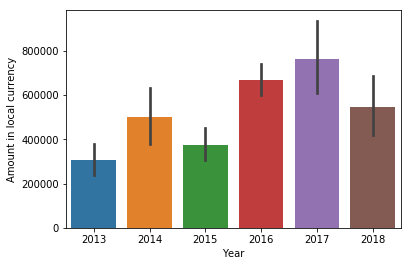

In [8]:
sns.barplot(x="Year", y="Amount in local currency", data=data, estimator=sum)

In [9]:
data.describe()

,Ref ID,PO,Amount,Amount in local currency,Balance,Month,Year
count,1.057000e+03,0.0,1057.000000,178.000000,1057.000000,1057.000000,1057.000000
mean,9.423810e+07,NaN,0.094371,17777.738708,129.195052,6.547777,2015.674551
std,5.088744e+07,NaN,191.207409,11410.837976,172.849237,3.423382,1.619614
min,2.214635e+07,NaN,-1088.010000,568.680000,-77.440000,1.000000,2013.000000
25%,4.745969e+07,NaN,-20.000000,9538.175000,0.990000,4.000000,2014.000000
50%,9.196920e+07,NaN,-1.990000,15840.695000,61.870000,7.000000,2016.000000
75%,1.311527e+08,NaN,50.000000,22110.722500,213.000000,9.000000,2017.000000
max,1.992969e+08,NaN,1210.000000,68125.750000,1210.000000,12.000000,2018.000000


In [11]:
# Group multiple variable with target statistic
df = data.groupby(['Year', 'Month','Team'],as_index=False)['Amount in local currency'].sum()

In [12]:
df

,Year,Month,Team,Amount in local currency
0,2013,1,BlueLeap Consulting,0.0
1,2013,1,Colm O Donnell,0.0
2,2013,1,Stonehenge Projects Inc > Owen Brown,0.0
3,2013,1,W Trading Partners,0.0
4,2013,2,BlueLeap Consulting,0.0
5,2013,2,Colm O Donnell,0.0
6,2013,2,Personal > ItaCheOrg,0.0
7,2013,2,Virtual Dating Assistants,0.0
8,2013,2,WH-SD,0.0
9,2013,3,BlueLeap Consulting,0.0


In [21]:
# This method is for gaining result by single variable. "as_index=False is for table format"
data.groupby('Year', as_index=False).agg({"Amount in local currency":sum})

,Year,Amount in local currency
0,2013,307142.50
1,2014,500827.22
2,2015,376385.51
3,2016,667552.55
4,2017,764415.56
5,2018,548114.15


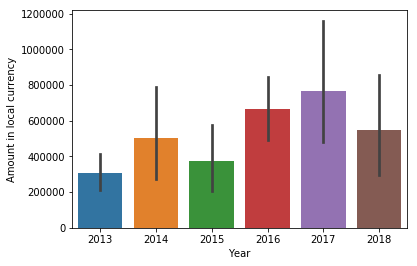

In [46]:
sns.barplot(x="Year", y="Amount in local currency", data=df, estimator=sum)

In [34]:

df2 = pd.pivot_table(data_1,index=["Country"],values=['Life_Time_Earning'],aggfunc=np.sum)
df2.head()

,Life_Time_Earning
Country,
Australia,4539.69
Canada,844.75
Denmark,33.33
Domenian Repulic,0.00
Germany,1233.61


In [15]:
df = data.groupby(['Year', 'Month','Team'],as_index=False)['Amount in local currency'].count()
df.head()

,Year,Month,Team,Amount in local currency
0,2013,1,BlueLeap Consulting,0
1,2013,1,Colm O Donnell,0
2,2013,1,Stonehenge Projects Inc > Owen Brown,0
3,2013,1,W Trading Partners,0
4,2013,2,BlueLeap Consulting,0


In [60]:
# This syntax below will export df to csv and save it to desktop

df.to_csv('d:\\temp.csv', sep='\t')

In [32]:
import pandas as pd
import os

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
# gauth.LocalWebserverAuth()
drive = GoogleDrive(gauth)

In [62]:
df.to_csv("d:\\Upwork.csv")
with open("d:\\Upwork.csv", "r") as f:
	fn = os.path.basename(f.name)
	file_drive = drive.CreateFile({'title': fn})
	file_drive.SetContentString(f.read())
	file_drive.Upload()
	print("The file:has been uploaded")

The file:has been uploaded


In [59]:
# Upload file to folder
# file = drive.CreateFile({"parents": [{"kind": "https:\\drive.google.com\\drive\\folders\\1rt57nZS8xBQC4GNeQN3XzGR16M7x29KF", "id": folderid}]})
# file.SetContentFile(https:\\drive.google.com\\drive\\folders\\1rt57nZS8xBQC4GNeQN3XzGR16M7x29KF)   # see carefully this is not SetContentString(f.read()) which is other method/function
# file.Upload({'convert': True})   # Convert csv to google sheet.

SyntaxError: invalid syntax (<ipython-input-59-65d06b680e09>, line 3)